# 🚀 Flujo Completo: Dataset → Entrenamiento → Clasificación

Este notebook integra los 3 módulos principales del proyecto:
1. **GeneradorDataset**: Genera datos de letras con distorsión
2. **MLP**: Red neuronal que aprende a clasificar
3. **ClasificadorLetras**: Interfaz para usar y evaluar el modelo

## 📦 Paso 1: Importar Librerías y Módulos

---
⚠️ **IMPORTANTE**: Este notebook debe ejecutarse **EN ORDEN** celda por celda.
- Puedes usar **"Run All"** (Ctrl+Shift+Alt+Enter) para ejecutar todas las celdas
- O ejecutar celda por celda con **Shift+Enter**

**NO saltes pasos**, especialmente el **Paso 8: Entrenar** que es crítico.

---

In [112]:
# Librerías estándar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Módulos del proyecto
from generador_dataset import GeneradorDataset
from mlp import MLP
from clasificador import ClasificadorLetras

print("✅ Librerías y módulos importados correctamente")

✅ Librerías y módulos importados correctamente


---
# 🏭 PARTE 1: Generación de Datos

Generamos un dataset de 500 ejemplos con distorsiones específicas.

## 🎯 Paso 2: Crear el Generador

In [113]:
generador = GeneradorDataset()
print(f"✅ GeneradorDataset creado")
print(f"   Letras: {generador.letras}")

✅ GeneradorDataset creado
   Letras: ['B', 'D', 'F']


## ⚙️ Configuración: Seleccionar cantidad de ejemplos

**Nota**: El nuevo método `generar_dataset_equilibrado()` garantiza distribución exacta:
- 🎯 10% perfectos + 90% distorsionados
- 🎯 Distribuidos equitativamente entre B, D y F
- 🎯 Distorsión aleatoria 1%-30% para cada ejemplo distorsionado

In [114]:
# ========================================
# CONFIGURACIÓN DEL PROYECTO
# ========================================

print("="*70)
print("⚙️  CONFIGURACIÓN DEL ENTRENAMIENTO")
print("="*70)

# Opción 1: Modo interactivo (pide input al usuario)
MODO_INTERACTIVO = False  # Cambiar a True si quieres elegir interactivamente

if MODO_INTERACTIVO:
    print("\n📊 Cantidad de ejemplos disponibles:")
    print("   1️⃣  100 ejemplos  (rápido, pruebas)")
    print("   2️⃣  500 ejemplos  (equilibrado, recomendado)")
    print("   3️⃣  1000 ejemplos (completo, más tiempo)")
    
    opcion = input("\n¿Qué cantidad deseas usar? (1/2/3) [default=2]: ").strip()
    
    if opcion == "1":
        cantidad = 100
    elif opcion == "3":
        cantidad = 1000
    else:
        cantidad = 500  # Por defecto
else:
    # Modo automático (sin input)
    cantidad = 100  # Cambiar aquí para usar otra cantidad por defecto

print(f"\n✅ Configuración seleccionada:")
print(f"   📦 Cantidad de ejemplos: {cantidad}")
print("="*70)

⚙️  CONFIGURACIÓN DEL ENTRENAMIENTO

✅ Configuración seleccionada:
   📦 Cantidad de ejemplos: 100


**Nota**: Puedes cambiar `MODO_INTERACTIVO = False` si quieres ejecutar el notebook sin pausas para input.

## 🔄 Recargar Módulos (si fue modificado)

Si modificaste `generador_dataset.py` después de ejecutar el Paso 1, ejecuta esta celda para recargar el módulo actualizado.

In [115]:
# Recargar el módulo generador_dataset si fue modificado
import importlib
import generador_dataset
importlib.reload(generador_dataset)
from generador_dataset import GeneradorDataset

# Recrear el generador con el módulo actualizado
generador = GeneradorDataset()
print("✅ Módulo generador_dataset recargado")
print(f"✅ GeneradorDataset recreado con los cambios más recientes")
print(f"   Métodos disponibles: {[m for m in dir(generador) if not m.startswith('_')]}")

✅ Módulo generador_dataset recargado
✅ GeneradorDataset recreado con los cambios más recientes
   Métodos disponibles: ['aplicar_distorsion', 'base_path', 'c_letras', 'cargar_dataset', 'generar_dataset_equilibrado', 'generar_letra', 'letras', 'verificar_distribucion']


## 📊 Paso 3: Generar Dataset Equilibrado

**Nuevo método mejorado**: Ahora usamos `generar_dataset_equilibrado()` que garantiza:
- ✅ Exactamente 10% de ejemplos perfectos distribuidos equitativamente (B, D, F)
- ✅ Exactamente 90% de ejemplos distorsionados distribuidos equitativamente
- ✅ Distorsión aleatoria entre 1% y 30% para cada ejemplo

**Distribución garantizada**:
- **100 ejemplos**: 3B + 3D + 4F perfectos | 30B + 30D + 30F distorsionados
- **500 ejemplos**: 16B + 17D + 17F perfectos | 150B + 150D + 150F distorsionados  
- **1000 ejemplos**: 33B + 33D + 34F perfectos | 300B + 300D + 300F distorsionados

In [116]:
print(f"🎯 Generando dataset equilibrado de {cantidad} ejemplos")
print("="*60)

# Generar dataset con el nuevo método equilibrado
# Este método garantiza distribución exacta por letra:
# - 10% perfectos (sin distorsión) distribuidos equitativamente
# - 90% distorsionados (1%-30%) distribuidos equitativamente
generador.generar_dataset_equilibrado(
    cant=cantidad,
    min_distorsion=1,      # Distorsión mínima 1%
    max_distorsion=30,     # Distorsión máxima 30%
    metodo_v2=False        # False=inversión 0↔1, True=apagar 1s→0s
)

print("="*60)
print("✅ Dataset equilibrado generado!")
print("\n📊 Distribución garantizada:")
if cantidad == 100:
    print("   Perfectos: 3B + 3D + 4F = 10")
    print("   Distorsionados: 30B + 30D + 30F = 90")
elif cantidad == 500:
    print("   Perfectos: 16B + 17D + 17F = 50")
    print("   Distorsionados: 150B + 150D + 150F = 450")
else:  # 1000
    print("   Perfectos: 33B + 33D + 34F = 100")
    print("   Distorsionados: 300B + 300D + 300F = 900")

🎯 Generando dataset equilibrado de 100 ejemplos
✅ Dataset de 100 ejemplos generado (modo: mixto)
   🎯 Píxeles activos por letra: B=19, D=19, F=14
   📊 Perfectos: 9 (10%)
   🔀 Distorsionados: 91 (90%)
✅ Dataset equilibrado generado!

📊 Distribución garantizada:
   Perfectos: 3B + 3D + 4F = 10
   Distorsionados: 30B + 30D + 30F = 90


## 📂 Paso 4: Cargar los Datos

## ✅ Verificación: Comprobar distribución del dataset

In [117]:
# Verificar distribución usando el método del generador
distribucion = generador.verificar_distribucion(cantidad)

📊 Verificación de distribución del dataset:
   Total ejemplos: 100
   B: 33 ejemplos (33.0%)
   D: 33 ejemplos (33.0%)
   F: 34 ejemplos (34.0%)

✅ Distribución balanceada: 33 + 33 + 34 = 100


In [118]:
# Cargar dataset usando el método del generador
X_dist, y_dist = generador.cargar_dataset(cantidad)

# Diccionario para mapear índices a letras (usado en celdas posteriores)
letras_map = {0: 'B', 1: 'D', 2: 'F'}

print(f"✅ Datos cargados: {len(X_dist)} ejemplos")
print(f"   Forma X: {X_dist.shape}")
print(f"   Forma y: {y_dist.shape}")

✅ Datos cargados: 100 ejemplos
   Forma X: (100, 100)
   Forma y: (100, 3)


## 🔍 Paso 5: Visualizar Ejemplos

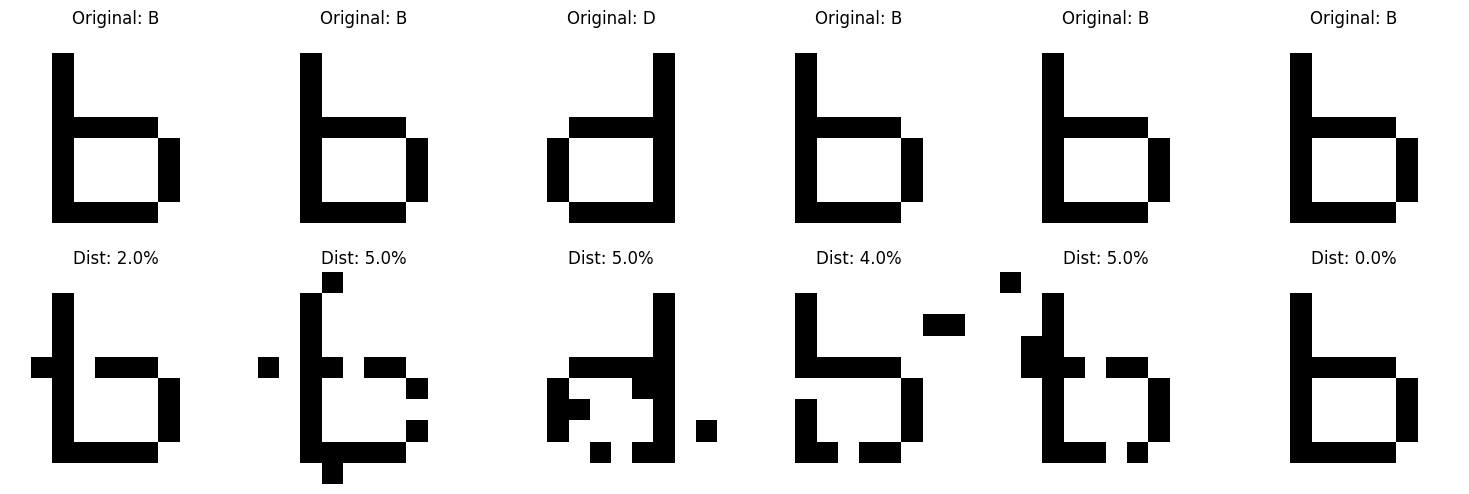

In [119]:
# Recargar visualizador para obtener las nuevas funciones
import importlib
import visualizador
importlib.reload(visualizador)
from visualizador import visualizar_ejemplos_originales_vs_distorsionados

# Visualizar comparación: originales vs distorsionados
visualizar_ejemplos_originales_vs_distorsionados(generador, X_dist, y_dist, letras_map, num_ejemplos=6)

---
# 🧠 PARTE 2: Entrenamiento del MLP

## 🔄 Paso 6: Preparar Datos (Train/Validación)

Dividimos el dataset en dos conjuntos:
- **Entrenamiento (Train)**: Datos que el MLP usará para aprender (70%, 80% o 90%)
- **Validación (Val)**: Datos para evaluar el modelo sin haberlos visto antes (30%, 20% o 10%)

Esto nos permite detectar **overfitting** (memorización vs generalización).

In [120]:
from sklearn.model_selection import train_test_split

# ========================================
# CONFIGURACIÓN DE VALIDACIÓN
# ========================================

print("="*70)
print("⚙️  CONFIGURACIÓN DE TRAIN/VALIDACIÓN")
print("="*70)

# Opción: Modo interactivo o automático
MODO_INTERACTIVO_VAL = False  # Cambiar a True para elegir interactivamente

if MODO_INTERACTIVO_VAL:
    print("\n📊 Porcentaje para VALIDACIÓN:")
    print("   1️⃣  10% validación / 90% entrenamiento")
    print("   2️⃣  20% validación / 80% entrenamiento (recomendado)")
    print("   3️⃣  30% validación / 70% entrenamiento")
    
    opcion_val = input("\n¿Qué split deseas usar? (1/2/3) [default=2]: ").strip()
    
    if opcion_val == "1":
        porcentaje_validacion = 0.10
    elif opcion_val == "3":
        porcentaje_validacion = 0.30
    else:
        porcentaje_validacion = 0.20  # Por defecto
else:
    # Modo automático
    porcentaje_validacion = 0.20  # 20% validación, 80% entrenamiento

print(f"\n✅ Split seleccionado:")
print(f"   📦 Validación:    {int(porcentaje_validacion*100)}%")
print(f"   📦 Entrenamiento: {int((1-porcentaje_validacion)*100)}%")
print("="*70)

⚙️  CONFIGURACIÓN DE TRAIN/VALIDACIÓN

✅ Split seleccionado:
   📦 Validación:    20%
   📦 Entrenamiento: 80%


**Nota**: Puedes cambiar `MODO_INTERACTIVO_VAL = False` y el valor de `porcentaje_validacion` (0.10, 0.20 o 0.30) para usar diferentes splits.

### 🔀 Dividir los datos manteniendo proporción de clases

In [121]:
print(f"\n🔀 Dividiendo datos...")
print(f"   Total de ejemplos: {len(X_dist)}")

# Dividir datos manteniendo proporción de clases (estratificación)
# stratify asegura que B, D y F mantengan la misma proporción en ambos conjuntos
X_train, X_val, y_train, y_val = train_test_split(
    X_dist, y_dist,
    test_size=porcentaje_validacion,
    random_state=42,  # Semilla para reproducibilidad
    stratify=np.argmax(y_dist, axis=1)  # Mantener proporción B/D/F
)

# Mezclar solo el conjunto de entrenamiento (validación se deja sin mezclar)
indices = np.arange(len(X_train))
np.random.shuffle(indices)
X_train = X_train[indices]
y_train = y_train[indices]

print(f"\n✅ Datos divididos exitosamente:")
print(f"   - Entrenamiento: {len(X_train)} ejemplos ({(1-porcentaje_validacion)*100:.0f}%)")
print(f"   - Validación:    {len(X_val)} ejemplos ({porcentaje_validacion*100:.0f}%)")

# Verificar distribución por letra en cada conjunto
print(f"\n📊 Distribución por letra:")
print(f"\n   ENTRENAMIENTO:")
for i, letra in enumerate(['B', 'D', 'F']):
    count = np.sum(np.argmax(y_train, axis=1) == i)
    print(f"      {letra}: {count} ejemplos ({count/len(y_train)*100:.1f}%)")

print(f"\n   VALIDACIÓN:")
for i, letra in enumerate(['B', 'D', 'F']):
    count = np.sum(np.argmax(y_val, axis=1) == i)
    print(f"      {letra}: {count} ejemplos ({count/len(y_val)*100:.1f}%)")

print(f"\n✅ Datasets de Train y Val listos para entrenar!")


🔀 Dividiendo datos...
   Total de ejemplos: 100

✅ Datos divididos exitosamente:
   - Entrenamiento: 80 ejemplos (80%)
   - Validación:    20 ejemplos (20%)

📊 Distribución por letra:

   ENTRENAMIENTO:
      B: 26 ejemplos (32.5%)
      D: 27 ejemplos (33.8%)
      F: 27 ejemplos (33.8%)

   VALIDACIÓN:
      B: 7 ejemplos (35.0%)
      D: 6 ejemplos (30.0%)
      F: 7 ejemplos (35.0%)

✅ Datasets de Train y Val listos para entrenar!


### 📊 Visualización de la división

Ahora tenemos dos conjuntos de datos independientes:

```
Dataset Original (100 ejemplos)
        ↓
   ┌────┴────┐
   ↓         ↓
Train(80)  Val(20)
   ↓         ↓
Entrena    Evalúa
el MLP     sin ver
```

**¿Por qué es importante?**
- **Train**: El MLP aprende de estos datos (ajusta pesos)
- **Val**: El MLP NO ve estos datos durante el entrenamiento
- Comparando los errores en ambos podemos detectar **overfitting** (memorización)

---
# 🔬 PARTE 2: Entrenamiento con Validación

Vamos a entrenar el MLP usando **validación** para detectar overfitting.

### ¿Qué es validación?
- **Conjunto de entrenamiento**: Datos que el modelo usa para aprender
- **Conjunto de validación**: Datos que el modelo **NO ve** durante el entrenamiento
- Se evalúa en ambos conjuntos para detectar si el modelo **memoriza** (overfitting) o **aprende** (generalización)

### ¿Qué es overfitting?
- El modelo se ajusta **demasiado** a los datos de entrenamiento
- Funciona muy bien en entrenamiento pero **mal** en validación
- Señal: Gap grande entre error de entrenamiento y validación

## 🔀 Paso 7: Dividir datos en Train/Validación (ya hecho anteriormente)

In [122]:
# NOTA: Este paso ya se ejecutó anteriormente en el Paso 6
# Los datos ya están divididos en X_train, X_val, y_train, y_val
# Esta celda es solo informativa

print("ℹ️  Los datos ya están divididos (Paso 6):")
print(f"   - Entrenamiento: {len(X_train)} ejemplos")
print(f"   - Validación:    {len(X_val)} ejemplos")
print(f"\n✅ Listos para entrenar con validación")

ℹ️  Los datos ya están divididos (Paso 6):
   - Entrenamiento: 80 ejemplos
   - Validación:    20 ejemplos

✅ Listos para entrenar con validación


## 🎯 Paso 8: Crear y Entrenar MLP CON Validación

In [138]:
# Crear MLP con la API simplificada (2 capas ocultas)
mlp = MLP(
    capas_ocultas=2,
    cantidad_neuronas1=6,
    cantidad_neuronas2=6,
    learning_rate=0.4,
    momentum=0.6,
    epochs=10
)

print(f"🏗️  Arquitectura: {mlp.arquitectura}")
print(f"\n🏃 Entrenando con validación...\n")

# Entrenar CON datos de validación
historial = mlp.entrenar(
    X_train, y_train,              # Datos de entrenamiento
    X_val=X_val, y_val=y_val,      # Datos de validación
    verbose=True  # Mostrará ambos errores época por época
)

print(f"\n✅ Entrenamiento completado!")
print(f"   - Error train (inicial): {historial['train_loss'][0]:.6f}")
print(f"   - Error train (final):   {historial['train_loss'][-1]:.6f}")
print(f"   - Error val (inicial):   {historial['val_loss'][0]:.6f}")
print(f"   - Error val (final):     {historial['val_loss'][-1]:.6f}")
print(f"   - Gap final:             {historial['val_loss'][-1] - historial['train_loss'][-1]:.6f}")

✅ MLP creado con arquitectura: [100, 6, 6, 3]
   Capas ocultas: [6, 6] (activación LINEAL)
   Capa de salida: 3 neuronas (activación SIGMOIDAL)
   Learning rate: 0.4, Momentum: 0.6, Épocas: 10
🏗️  Arquitectura: [100, 6, 6, 3]

🏃 Entrenando con validación...

Época 1/10 - Error Entrenamiento (MSE): 0.296577 - Error Validación (MSE): 0.211293
Época 2/10 - Error Entrenamiento (MSE): 0.204465 - Error Validación (MSE): 0.173855
Época 3/10 - Error Entrenamiento (MSE): 0.173072 - Error Validación (MSE): 0.150639
Época 4/10 - Error Entrenamiento (MSE): 0.151167 - Error Validación (MSE): 0.119928
Época 5/10 - Error Entrenamiento (MSE): 0.121285 - Error Validación (MSE): 0.095680
Época 6/10 - Error Entrenamiento (MSE): 0.097659 - Error Validación (MSE): 0.080075
Época 7/10 - Error Entrenamiento (MSE): 0.082020 - Error Validación (MSE): 0.068878
Época 8/10 - Error Entrenamiento (MSE): 0.070654 - Error Validación (MSE): 0.056936
Época 9/10 - Error Entrenamiento (MSE): 0.058646 - Error Validación (

## 📊 Paso 9: Graficar MSE de Entrenamiento vs Validación

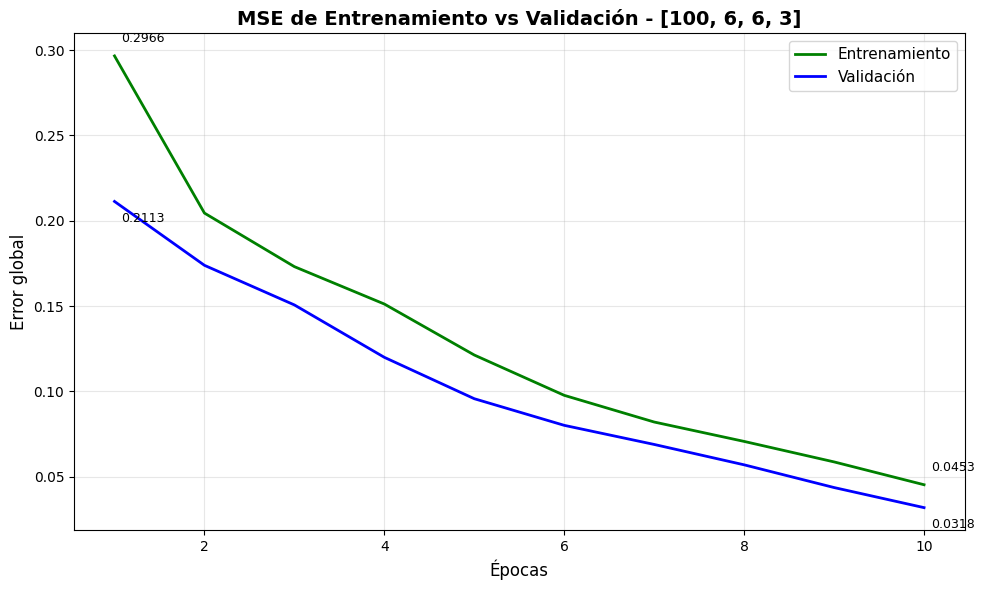

In [139]:
from visualizador import graficar_mse_entrenamiento_validacion, imprimir_resumen_entrenamiento

# Graficar las curvas MSE
graficar_mse_entrenamiento_validacion(
    historial,
    titulo=f"MSE de Entrenamiento vs Validación - {mlp.arquitectura}"
)

## 🔍 Paso 10: Análisis de Overfitting

In [140]:
# Imprimir resumen completo con análisis
imprimir_resumen_entrenamiento(historial)


📊 RESUMEN DEL ENTRENAMIENTO

📉 Error Entrenamiento:
   - Inicial: 0.296577
   - Final:   0.045265
   - Mejora:  84.74%

📉 Error Validación:
   - Inicial: 0.211293
   - Final:   0.031849
   - Mejora:  84.93%

🎯 Análisis:
   - Gap (val - train): -0.013416
   - Estado: ✅ EXCELENTE
   - El modelo generaliza mejor de lo esperado



## 📈 Paso 11: Evaluar en Entrenamiento y Validación

In [141]:
# Recargar visualizador para obtener las nuevas funciones
import importlib
import visualizador
importlib.reload(visualizador)
from visualizador import evaluar_y_comparar

# Crear clasificador
clasificador = ClasificadorLetras(mlp)
letras_map = {0: 'B', 1: 'D', 2: 'F'}

# Evaluar y comparar usando función modular
metricas = evaluar_y_comparar(clasificador, X_train, y_train, X_val, y_val, letras_map)

🔹 Evaluación en conjunto de ENTRENAMIENTO:
   Precisión: 100.00% (80/80)

🔹 Evaluación en conjunto de VALIDACIÓN:
   Precisión: 100.00% (20/20)

📈 ANÁLISIS:
   Diferencia: 0.00%
   ✅ Buen balance entre entrenamiento y validación


---
# 🎛️ PARTE 3: Clasificación y Evaluación

Ahora que tenemos el modelo entrenado (`mlp`) y el clasificador creado (`clasificador`),
vamos a evaluar su desempeño en todo el dataset y probar su robustez.

## 🧪 Paso 12: Evaluar Precisión en TODO el Dataset

In [142]:
aciertos = 0
for i in range(len(X_dist)):
    resultado = clasificador.clasificar_patron(X_dist[i])
    pred = resultado['letra']
    real = letras_map[np.argmax(y_dist[i])]
    if pred == real:
        aciertos += 1

precision = (aciertos / len(X_dist)) * 100
print(f"✅ Precisión: {precision:.2f}%")
print(f"   Aciertos: {aciertos}/{len(X_dist)}")

✅ Precisión: 100.00%
   Aciertos: 100/100


## 🔍 Paso 13: Visualizar Predicciones

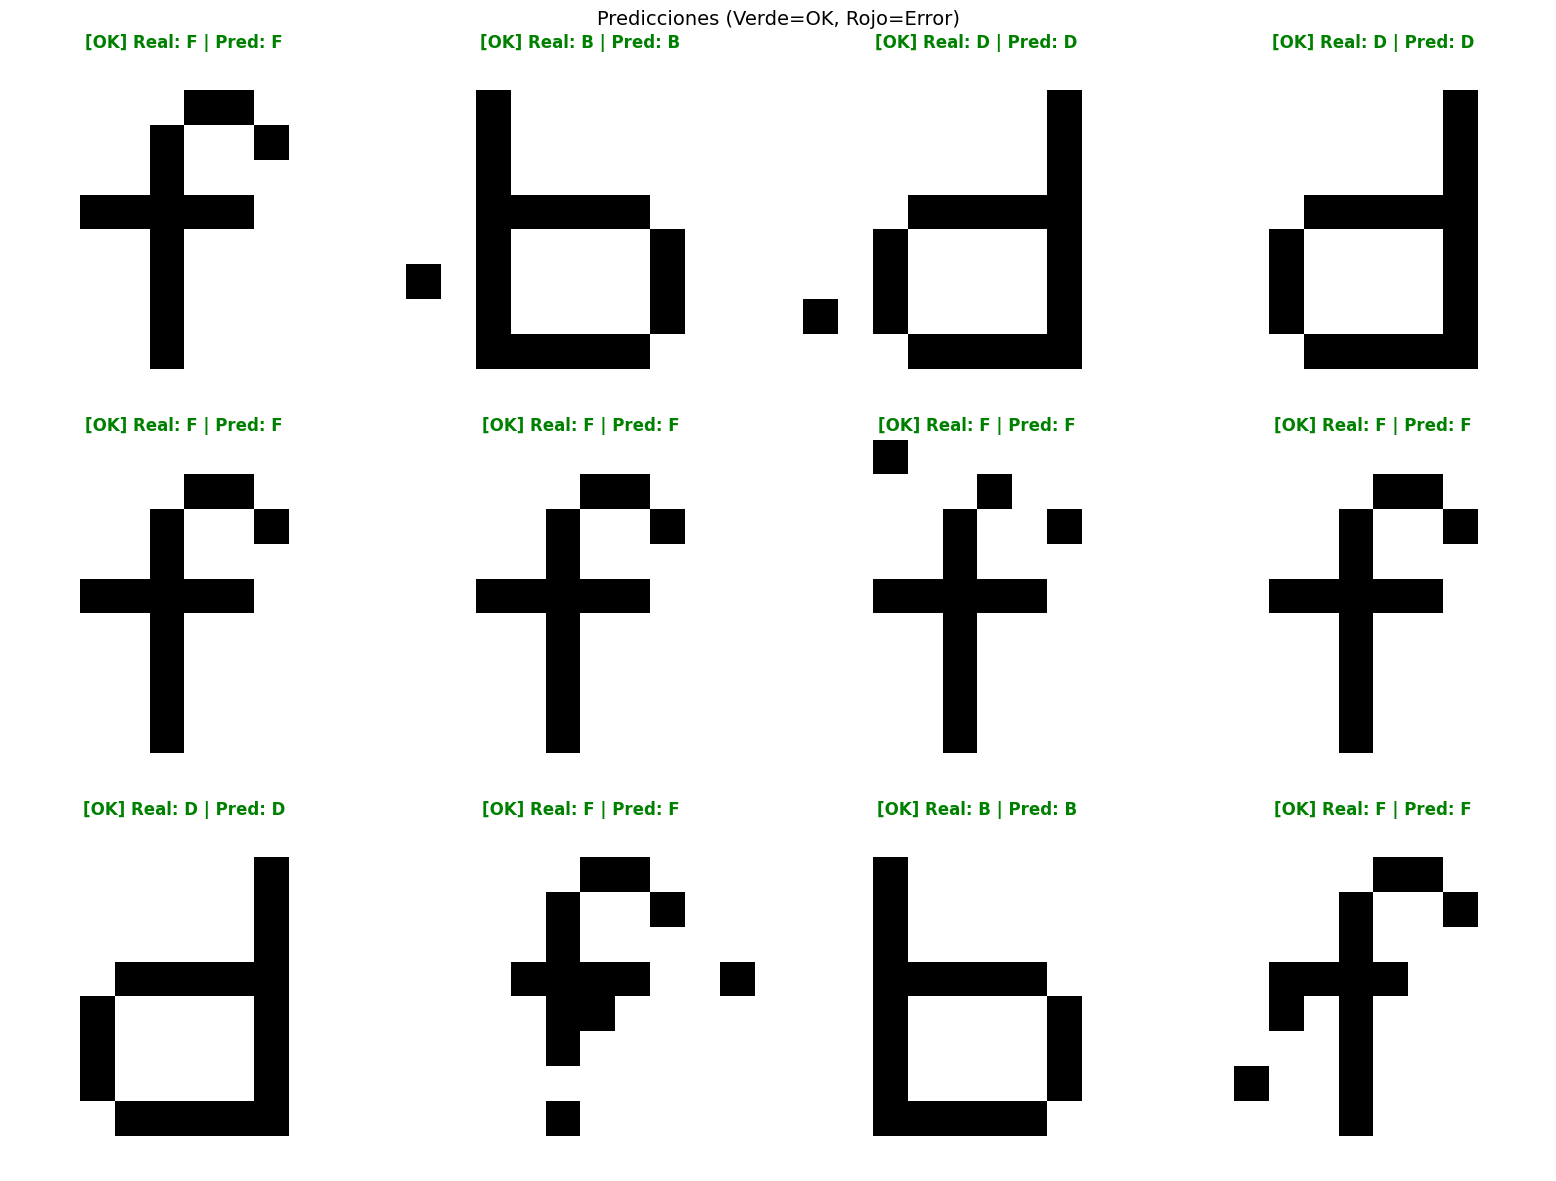

{'letra': 'F',
 'clase': np.int64(2),
 'probabilidades': array([0.05190997, 0.1170367 , 0.942087  ]),
 'confianza': np.float64(0.9420870039755578)}

In [143]:
# Recargar visualizador para obtener las nuevas funciones
import importlib
import visualizador
importlib.reload(visualizador)
from visualizador import visualizar_predicciones_aleatorias

# Visualizar predicciones aleatorias
visualizar_predicciones_aleatorias(clasificador, X_dist, y_dist, letras_map, num_ejemplos=12)

## 🎯 Paso 14: Probar Robustez

In [144]:
print("🧪 Probando robustez...")
print("="*60)

for letra in ['B', 'D', 'F']:
    print(f"\n📝 Letra {letra}:")
    clasificador.probar_distorsiones(
        letra=letra,
        distorsiones=[0, 5, 10, 15, 20, 25, 30]
    )

print("\n" + "="*60)

🧪 Probando robustez...

📝 Letra B:

🔍 Probando clasificación de letra 'B' con diferentes distorsiones:
✅ Distorsión  0% → Predicción: B (Confianza: 79.4%)
✅ Distorsión  5% → Predicción: B (Confianza: 85.4%)
✅ Distorsión 10% → Predicción: B (Confianza: 88.1%)
✅ Distorsión 15% → Predicción: B (Confianza: 55.6%)
✅ Distorsión 20% → Predicción: B (Confianza: 54.7%)
✅ Distorsión 25% → Predicción: B (Confianza: 79.5%)
✅ Distorsión 30% → Predicción: B (Confianza: 59.5%)

📝 Letra D:

🔍 Probando clasificación de letra 'D' con diferentes distorsiones:
✅ Distorsión  0% → Predicción: D (Confianza: 75.3%)
✅ Distorsión  5% → Predicción: D (Confianza: 68.6%)
✅ Distorsión 10% → Predicción: D (Confianza: 45.8%)
✅ Distorsión 15% → Predicción: D (Confianza: 83.3%)
✅ Distorsión 20% → Predicción: D (Confianza: 78.1%)
✅ Distorsión 25% → Predicción: D (Confianza: 93.1%)
❌ Distorsión 30% → Predicción: F (Confianza: 87.2%)

📝 Letra F:

🔍 Probando clasificación de letra 'F' con diferentes distorsiones:
✅ Distors